In [126]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [127]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head()

price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334                     15.74903   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                          -3.25185                      83.51840   
ethereum                        -12.88890                     186.77418   
tether                            0.28037                      -0.00542   
ripple                          -17.55245                      39.53888   
bitcoin-cash                    -13.71793                      21.66042   

              price_change_percentage_1y  
coin_id                                   
bitcoin                         37.51761  
ethereum                       101.96023  
tether                           0.01954  
ripple                         -16.60193  
bitcoin-cash                    14.49384

In [128]:
# Generate summary statistics
df_market_data.describe()

price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%                       0.109740                    -0.042370   
75%                       5.510740                     4.578130   
max                      24.239190                   140.795700   

       price_change_percentage_60d  price_change_percentage_200d  \
count                    41.000000                     41.000000   
mean                     -0.094119                    236.537432   
std                      47.365803                    435.225304   
min                     -44.822480                     -0.392100   
25%                     -25.907990                     21.660420   
50%                      -7.544550                     83.905200   
75%                       0.657260                    216.177610   
max                     223.064370                   2227.927820   

       price_change_percentage_1y  
count                   41.000000  
mean                   347.667956  
std                   1247.842884  
min                    -17.567530  
25%                      0.406170  
50%                     69.691950  
75%                    168.372510  
max                   7852.089700

In [129]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [134]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data)
df_market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [137]:
df_market_data_scaled.columns
columns = df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [138]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)
# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled= df_market_data_scaled.set_index("coin_id")
# Display sample data
df_market_data_scaled.head()


price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610                     0.545842   

              price_change_percentage_60d  price_change_percentage_200d  \
coin_id                                                                   
bitcoin                         -0.067495                     -0.355953   
ethereum                        -0.273483                     -0.115759   
tether                           0.008005                     -0.550247   
ripple                          -0.373164                     -0.458259   
bitcoin-cash                    -0.291203                     -0.499848   

              price_change_percentage_1y  
coin_id                                   
bitcoin                        -0.251637  
ethereum                       -0.199352  
tether                         -0.282061  
ripple                         -0.295546  
bitcoin-cash                   -0.270317

---

### Find the Best Value for k Using the Original Data.

In [139]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [60]:
# Create an empty list to store the inertia values
inertia = []
# Create a for loop to compute the inertia with each possible value of k
for i in k:
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)


C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [140]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

k     inertia
0   1  287.000000
1   2  198.571818
2   3  123.190482
3   4   79.022435
4   5   65.302379
5   6   52.101806
6   7   46.035250
7   8   37.284807
8   9   32.161417
9  10   28.075253

In [149]:
# Plot a line chart with all the inertia values computed with 
elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
    
)
# the different values of k to visually identify the optimal value for k.
elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** K= 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [142]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [143]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [145]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_predictions = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
kmeans_predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [146]:
# Create a copy of the DataFrame
market_predictions_df =df_market_data.copy()

In [147]:
# Add a new column to the DataFrame with the predicted clusters
market_predictions_df["kmeans"] = kmeans_predictions

# Display sample data
market_predictions_df[['kmeans']].head()

kmeans
coin_id             
bitcoin            2
ethereum           2
tether             0
ripple             0
bitcoin-cash       2

In [188]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = market_predictions_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="kmeans",
     hover_cols = ["coin_id"], 
    title = "Scatter Plot by Market Analysis - k=4"
    )
scatter_plot

:NdOverlay   [kmeans]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [189]:
# # Create a PCA model instance and set `n_components=3`.
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.datasets import make_blobs

# # Generate sample data
# X, _ = make_blobs(n_samples=41, centers=3, n_features=3, random_state=42)

# # Create a DataFrame
# df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
# df.head()

In [190]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

principal_df.head()

PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715

In [191]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** PC1 = 0.3719856, PC2 = 0.34700813, PC3 =  0.17603793

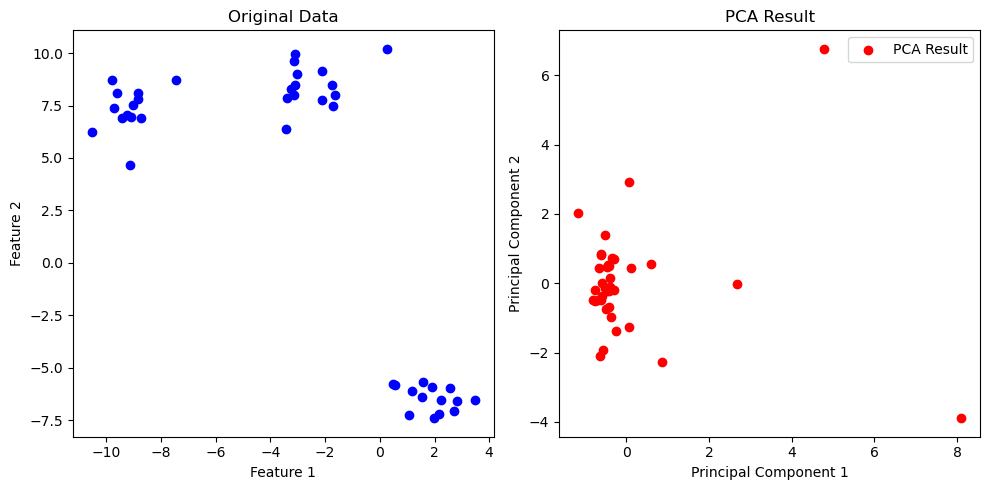

In [192]:
# Visualize original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Feature2'], color='b', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')

# Visualize PCA results
plt.subplot(1, 2, 2)
plt.scatter(principal_df['PC1'], principal_df['PC2'], color='r', label='PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')

plt.legend()
plt.tight_layout()
plt.show()


In [193]:
# Create a new DataFrame with the PCA data.
ccinfo_pca_df = pd.DataFrame(
    principal_df,
    columns=["PC1", "PC2","PC3"]
)

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data

ccinfo_pca_df["coin_id"] = df_market_data.index


# Set the coinid column as index
ccinfo_pca_df= ccinfo_pca_df.set_index("coin_id")

# # Display sample data
ccinfo_pca_df.head()

PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715

---

### Find the Best Value for k Using the PCA Data

In [162]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [194]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)

    k_model.fit(ccinfo_pca_df)

    inertia.append(k_model.inertia_)


C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [164]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

k     inertia
0   1  256.874086
1   2  168.811896
2   3   93.774626
3   4   49.665497
4   5   37.839466
5   6   27.720626
6   7   21.182776
7   8   17.016962
8   9   13.668325
9  10   10.484890

In [195]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)
elbow_pca_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k = 4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [167]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [196]:
# Fit the K-Means model using the PCA data
model.fit(ccinfo_pca_df)

C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eyasu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [197]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kmeans_predictions = model.predict(ccinfo_pca_df)

# Print the resulting array of cluster values.
kmeans_predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [198]:
# Create a copy of the DataFrame with the PCA data
market_prediction_df=ccinfo_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

market_prediction_df["cluster"] = kmeans_predictions

# Display sample data
market_prediction_df.head()

PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2

In [199]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
PCA_cluster_plot = market_prediction_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster"
)
PCA_cluster_plot

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [200]:
# Composite plot to contrast the Elbow curves
elbow_plot+elbow_pca_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [201]:
# Composite plot to contrast the clusters
scatter_plot+PCA_cluster_plot

:Layout
   .NdOverlay.I  :NdOverlay   [kmeans]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:It has fewer outlier